In [3]:
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import os

In [28]:
directory_path = r'D:\course_grad\202_embedded\dataset\HAR\UCI HAR Dataset\train\Inertial Signals'

train_data = {}
train_names = []
interval = 1
num_samples = 128

for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory_path, filename)
        file_lines = []
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip().split()
                line = [line[i * interval] for i in range(num_samples)]
                file_lines.append(list(map(lambda x: round(float(x), 4), line)))
                i += 1
        train_data[filename[:-4]] = file_lines
        train_names.append(filename[:-4])

In [29]:
def butter_lowpass_filter(data, cutoff, fs, order):
    nyquist = 0.5 * fs 
    normal_cutoff = cutoff / nyquist 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data) 
    return filtered_data

In [30]:
signal = train_data['body_acc_x_train'][0]

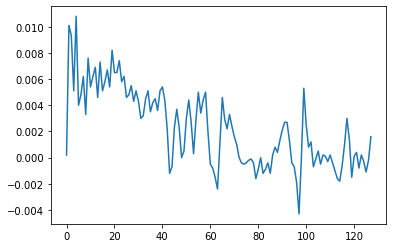

In [31]:
plt.plot(signal)

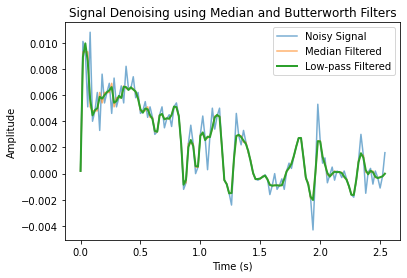

In [32]:
fs = 50  
cutoff = 20 
order = 3
t = np.linspace(0, 2.56, 128, endpoint=False)

median_filtered_signal = medfilt(signal, kernel_size=3)
lowpass_filtered_signal = butter_lowpass_filter(median_filtered_signal, cutoff, fs, order)

plt.plot(t, signal, label='Noisy Signal', alpha=0.6)
plt.plot(t, median_filtered_signal, label='Median Filtered', alpha=0.6)
plt.plot(t, lowpass_filtered_signal, label='Low-pass Filtered', linewidth=2)
plt.legend()
plt.title("Signal Denoising using Median and Butterworth Filters")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [37]:
T = 1/fs
n = len(lowpass_filtered_signal)
fft_signal = np.fft.fft(lowpass_filtered_signal)
fft_freqs = np.fft.fftfreq(n, T)

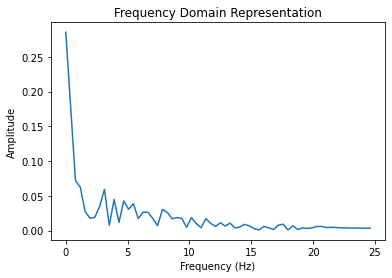

In [38]:
positive_freqs = fft_freqs[:n // 2]
positive_fft_signal = np.abs(fft_signal[:n // 2])

plt.plot(positive_freqs, positive_fft_signal)
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [39]:
def extract_freq_features(signal):
    T = 1/fs
    n = len(signal)
    fft_signal = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(n, T)
    
    psd = np.abs(fft_signal)**2 / len(signal)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_psd = psd[frequencies >= 0]
    total_spectrum_power = np.sum(positive_psd)
    
    spectral_centroid = np.sum(positive_frequencies * positive_psd) / np.sum(positive_psd)
    spectral_bandwidth = np.sqrt(np.sum(((positive_frequencies - spectral_centroid)**2) * positive_psd) / np.sum(positive_psd))
    return total_spectrum_power, spectral_bandwidth

In [40]:
for name in train_names:
    filename = name + '_denoised.txt'
    file_path = os.path.join(directory_path + ' Denoised', filename)
    with open(file_path, 'w') as file:
        for sig in train_data[name]:
            median_filtered_sig = medfilt(sig, kernel_size=3)
            lowpass_filtered_sig = butter_lowpass_filter(median_filtered_sig, cutoff, fs, order)
            tsp, sb = extract_freq_features(lowpass_filtered_sig)
            file.write(f'{tsp} {sb} ')
            file.write(' '.join(list(map(str, lowpass_filtered_sig))))
            file.write('\n')
        print(f'{filename} completed')

body_acc_x_train_denoised.txt completed
body_acc_y_train_denoised.txt completed
body_acc_z_train_denoised.txt completed
body_gyro_x_train_denoised.txt completed
body_gyro_y_train_denoised.txt completed
body_gyro_z_train_denoised.txt completed
total_acc_x_train_denoised.txt completed
total_acc_y_train_denoised.txt completed
total_acc_z_train_denoised.txt completed
